In [1]:
# imports
import pandas as pd
import os
import numpy as np
from Bio import SeqIO
from collections import Counter
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [12]:
# load start and stop for each gene
start_stop_df = pd.read_csv('20230714_Mbel_gene_start_stop.tsv', sep='\t', index_col=0)

In [14]:
braker = pd.read_csv('../aux_data//braker.gff3_red', sep='\t')
# get gene_ids for each entry
braker['gene_id'] = [i.rsplit('.',1)[0] for i in braker.ID]

# define support functions

In [24]:
def create_and_submit_rho_sbatch(batch, chunk):
    name="RHO_gene_Mbel_batch{batch}.job".format(batch=batch)
    sbatch = [ "#!/bin/bash -l",
                    "#SBATCH -A naiss2023-22-450",
                    "#SBATCH -t 6:0:0 ",
                    "#SBATCH -p core -n 1",
                    "#SBATCH -J {name}".format(name=name),
                    "#SBATCH -o {name}_%j.out".format(name=name),
                    "#SBATCH -e {name}_%j.error".format(name=name),
                    "#SBATCH --get-user-env",
                    "##command underneath this##",
                    "conda activate base",
                    "python get_Mbel_per_gene_rho_with_buffer.py --input {chunk} --flanksize 50000 --flankbuffer 10000".format(chunk=chunk)]
    with open(name, 'wt') as handle:
        handle.write("\n".join(sbatch))
    subprocess.call(["chmod", "766", name])
    subprocess.call(["sbatch", name])

In [28]:
#split into chunks and write them
chunk_n = 500
ss_split = np.array_split(start_stop_df, chunk_n)

In [29]:
len(ss_split[0])

62

In [35]:
for i, k in enumerate(ss_split):
    #print(i)
    chunkname = "/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk{chunk_i}.chunk".format(chunk_i=i)
    print(chunkname)
    #k.to_csv(chunkname, sep='\t')
    create_and_submit_rho_sbatch(batch=i, chunk=chunkname)

/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk0.chunk
Submitted batch job 41193888
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk1.chunk
Submitted batch job 41193889
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk2.chunk
Submitted batch job 41193890
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk3.chunk
Submitted batch job 41193891
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk4.chunk
Submitted batch job 41193892
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk5.chunk
Submitted batch job 41193893
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data/ss_chunk6.chunk
Submitted batch job 41193894
/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/interme

In [59]:
#braker_exin = braker.loc[braker.Type.isin(['exon', 'intron'])]

In [ ]:
'../ldhat/concat_Mbel_geq1000_rmind_hardfilt_exhet_biall_dp_qfilt_mac2_maxmiss06_rmfilt_sedmiss_phimp_LDhat_bpen1_statres_filtMQ70depth2stdev.txt_resorted'

! head -10 ../ldhat/concat_Mbel_excl5scaff_rmind_hardfilt_exhet_biall_dp_qfilt_mac2_maxmiss06_phimp_LDhat_bpen1_statres_100N_filtMQ70depth2stdev.txt_resorted

In [63]:
#split into chunks and write them
#chunk_n = 200
#braker_split = np.array_split(braker_exin, chunk_n)

In [9]:
#for i, k in enumerate(braker_split):
    #print(i)
#    chunkname = "exin_chunks/braker_chunk_{chunk_i}.gff3_chunk".format(chunk_i=i)
    #k.to_csv(chunkname, sep='\t')
#    create_and_submit_sbatch_rho_ex_in(batch=i, chunk=chunkname)

In [2]:
#TR_20230707_per_gene_analysis/Mbel/ss_chunks/ss_chunk0flanksize50000_buffer10000.rho
rho_chunks =  [ i for i in os.listdir("/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data") if i.endswith("flanksize50000_buffer10000.rho")]
rho_chunks = [i for i in rho_chunks if not i.startswith('test')]
rho_chunks_df = pd.concat([pd.read_csv(os.path.join("/home/tilman/termites/TR_20230707/TR_20230707_per_gene_analysis/Mbel/intermediate_data",i), sep='\t', header=None) for i in rho_chunks])

In [3]:
rho_chunks_df.columns = ['scaffold', 'weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank', 'gene_id']


In [4]:
rho_chunks_df = rho_chunks_df.replace('no_overlap_bin', np.nan)
rho_chunks_df[['weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank']] = rho_chunks_df[['weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank']].astype(float)

In [8]:
rho_chunks_df.isna().sum().sum()

20763

In [5]:
old_rho_chunks_df = pd.read_csv('./20230810_Mbel_rho_per_gene_and_50kbflank_with_10kbbuffer.tsv', sep='\t', index_col=0)

In [13]:
#old_rho_chunks_df = old_rho_chunks_df.replace('no_overlap_bin', np.nan)

In [6]:
old_rho_chunks_df.isna().sum().sum()

5003

In [16]:
rho_chunks_df.to_csv('../20230919_Mbel_rho_per_gene_and_50kbflank_with_10kbbuffer_newfilt.tsv', sep='\t')

In [19]:
rho_chunks_dfmelt = rho_chunks_df.melt(id_vars=['gene_id', 'scaffold'], value_vars=['weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank',] )

In [15]:
#rho_chunks_exin =  [ i for i in os.listdir("./exin_chunks") if i.endswith(".rho")]
#rho_chunks_exin = [i for i in rho_chunks_exin if not i.startswith('test')]
#rho_chunks_exin_df = pd.concat([pd.read_csv(os.path.join("./exin_chunks/",i), sep=',', index_col=0, header=None) for i in rho_chunks_exin])
#rho_chunks_exin_df.columns = list(braker_exin.columns)+['RHO']
#rho_chunks_exin_df.to_csv('./20230717_Mbel_rho_exons_and_introns.tsv', sep='\t')

In [20]:
rho_chunks_exin_df= pd.read_csv('./20230717_Mbel_rho_exons_and_introns.tsv', sep='\t')

In [22]:
rho_chunks_exin_df.RHO = rho_chunks_exin_df.RHO.replace('no_overlap_bin', np.nan).astype(float)

In [23]:
rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

In [ ]:
# make figures

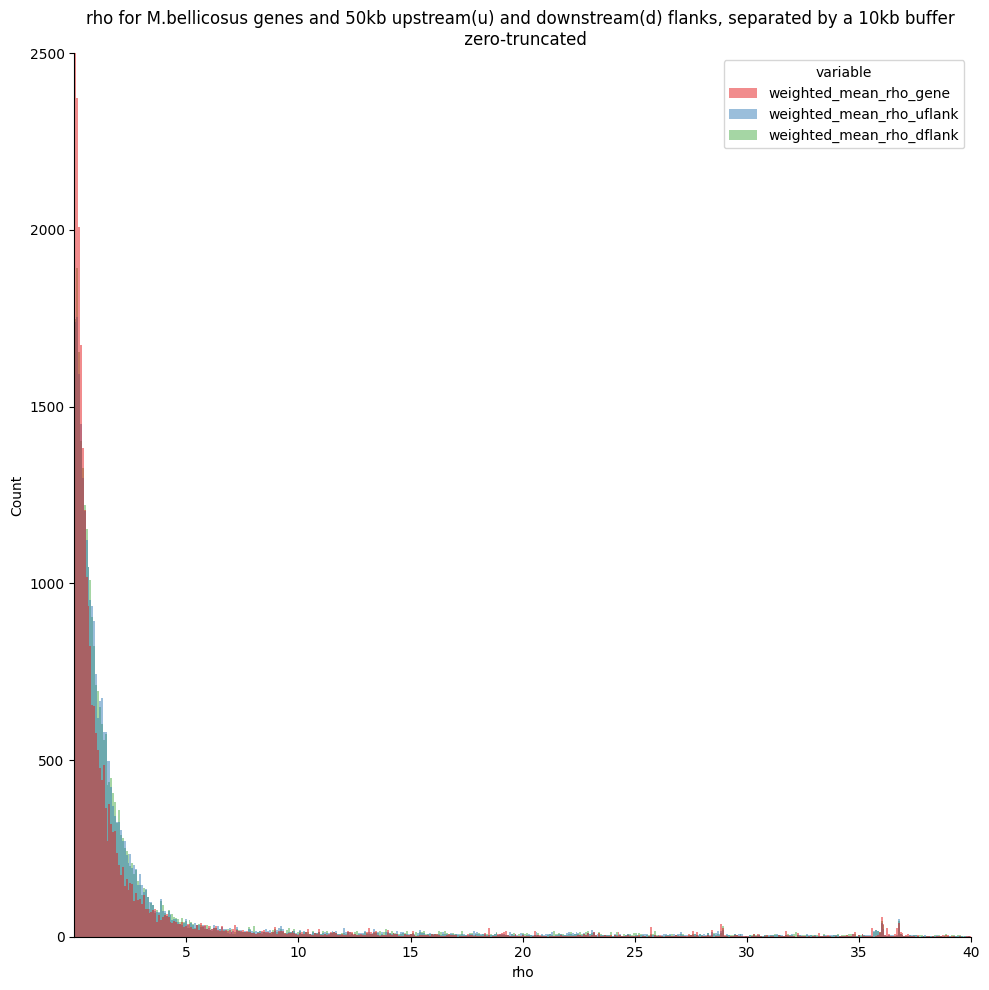

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.histplot(data=rho_chunks_dfmelt, x="value", hue="variable",linewidth=0, palette = ['#e41a1c','#377eb8','#4daf4a'])

ax.set_xlim(0.01,40)
ax.set_ylim(0.00,2500)
ax.set_title('rho for M.bellicosus genes and 50kb upstream(u) and downstream(d) flanks, separated by a 10kb buffer \n zero-truncated')
ax.set_xlabel('rho')

sns.despine()
plt.tight_layout()
plt.show()


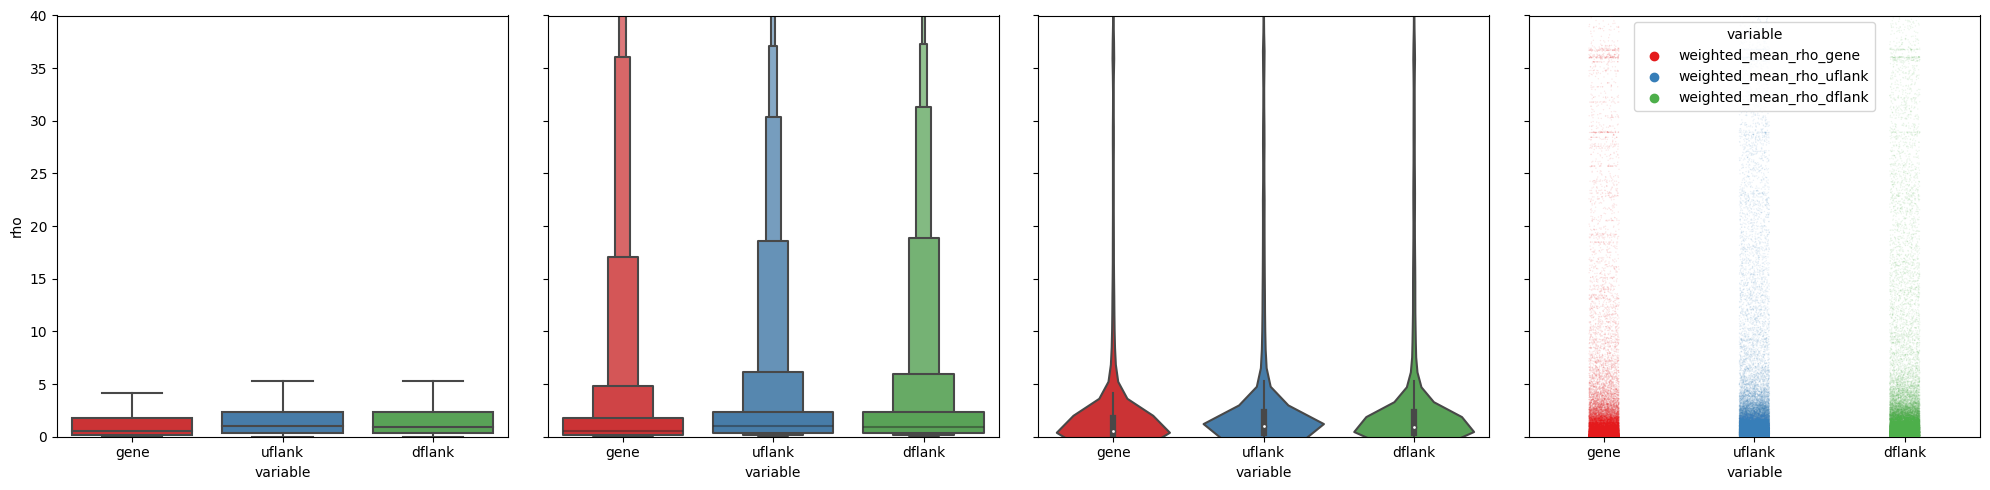

In [21]:

fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4, nrows=1, figsize=(20,5), sharey=True, sharex=True)
sns.boxplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax, fliersize=0)
sns.boxenplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax1)
sns.violinplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax2)
sns.stripplot(data=rho_chunks_dfmelt, y="value",x='variable', hue='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax3, alpha=0.1, s=1)


ax.set_xticklabels(['gene', 'uflank', 'dflank'])
ax.set_ylabel('rho')
ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax3.set_ylabel(' ')

ax.set_ylim(0,40)

plt.tight_layout()
plt.show()

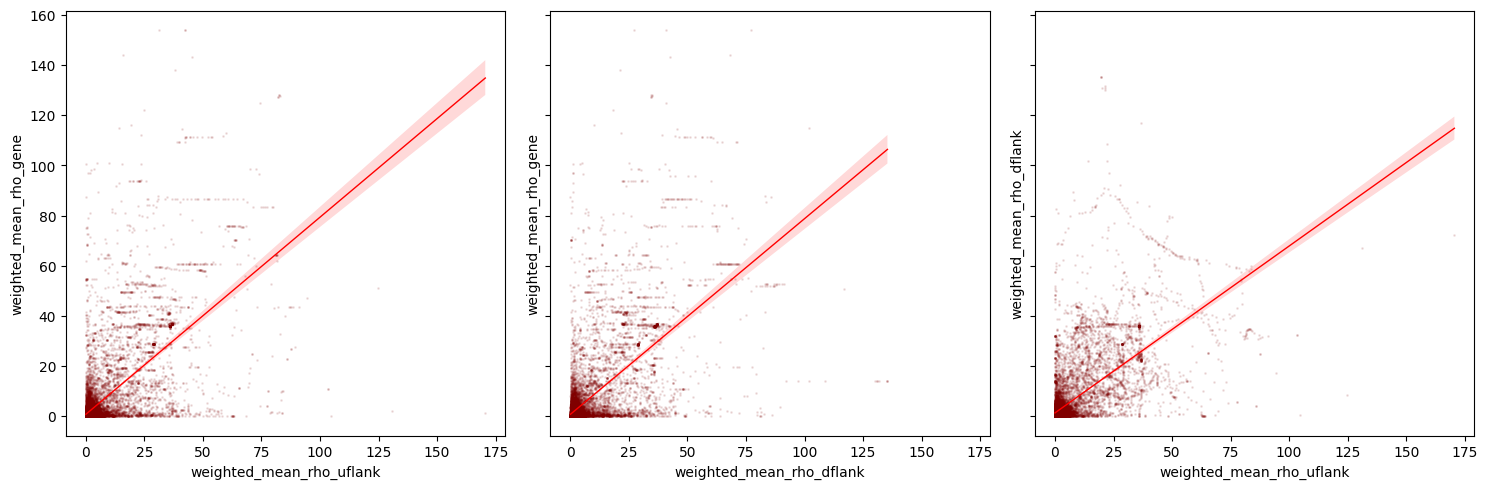

In [22]:
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(15,5), sharey=True, sharex=True)

sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_gene", ax=ax, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_dflank", y="weighted_mean_rho_gene", ax=ax1, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_dflank", ax=ax2, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )

plt.tight_layout()
#ax.set_ylim(0,3)
#ax.set_xlim(0,3)

plt.show()

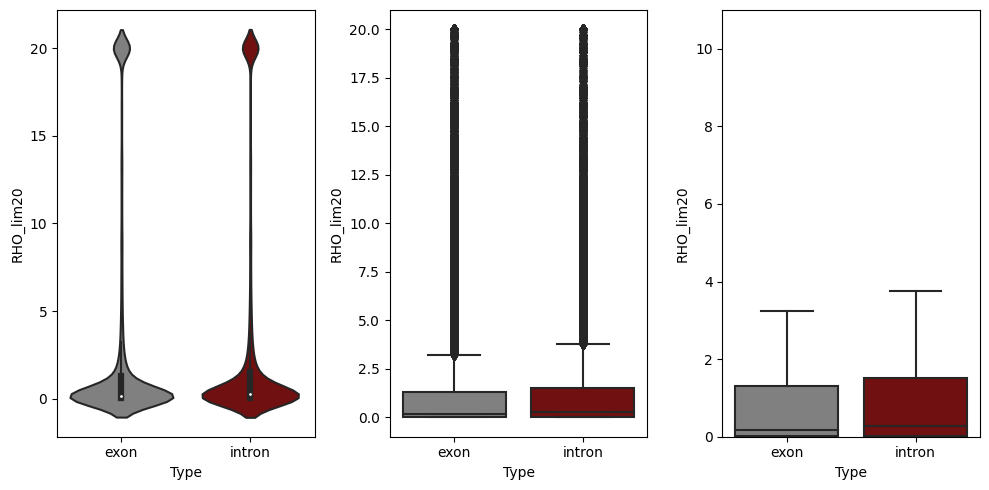

In [26]:

rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(10,5), sharey=False)

sns.violinplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax, palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax1,palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax2, fliersize=0,palette=['grey', 'maroon'])

ax2.set_ylim(0,11)
plt.tight_layout()
plt.show()

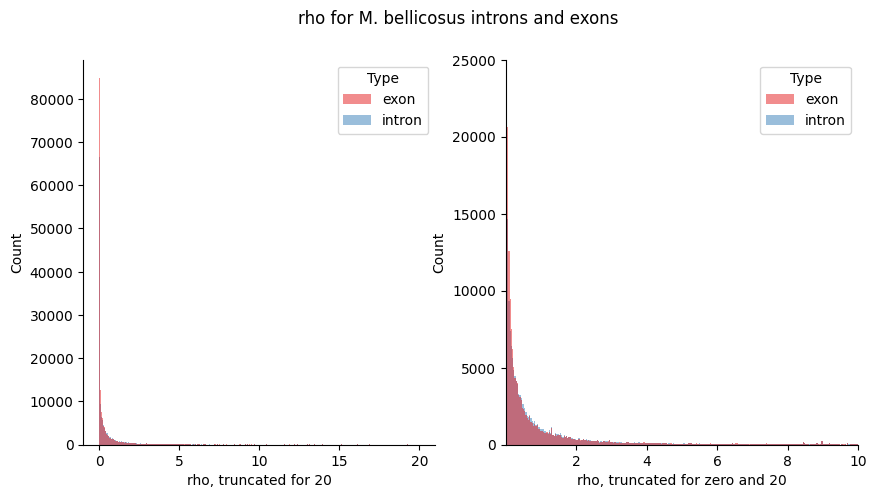

In [124]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax)
#x.set_xlim(0,2)
fig.suptitle('rho for M. bellicosus introns and exons')
ax.set_xlabel('rho, truncated for 20')

sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax1)
ax1.set_xlim(0.001,10)
ax1.set_ylim(0,25000)
ax1.set_xlabel('rho, truncated for zero and 20')

sns.despine()
plt.show()

,Scaffold,Type,Start_pos,End_pos,ID,gene_id,RHO
0,,,,,,,
786568,scaffold116,exon,4578,4727,g11107.t1.exon2,g11107.t1,0.931100
786572,scaffold41,exon,3949621,3949940,g13973.t1.exon1,g13973.t1,NaN
786573,scaffold41,intron,3949941,3952358,g13973.t1.intron1,g13973.t1,NaN
786575,scaffold41,exon,3952359,3952557,g13973.t1.exon2,g13973.t1,NaN
786576,scaffold41,intron,3952558,3956775,g13973.t1.intron2,g13973.t1,NaN
...,...,...,...,...,...,...,...
385271,scaffold12,intron,2918293,2918421,g7807.t2.intron24,g7807.t2,0.173518
385273,scaffold12,exon,2918422,2918582,g7807.t2.exon25,g7807.t2,0.172290
385274,scaffold12,intron,2918583,2919652,g7807.t2.intron25,g7807.t2,0.749690


In [104]:
rho_chunks_exin_df['RHO'].mean()

3.503446381640527

In [107]:
rho_chunks_exin_df.groupby('Type')['RHO'].mean()

Type
exon      3.508157
intron    3.498127
Name: RHO, dtype: float64

In [108]:
rho_chunks_exin_df.groupby('Type')['RHO'].sem()

Type
exon      0.021512
intron    0.022177
Name: RHO, dtype: float64

In [109]:
rho_chunks_exin_df.groupby('Type')['RHO'].std()

Type
exon      10.836931
intron    10.512917
Name: RHO, dtype: float64

In [110]:
rho_chunks_dfmelt.groupby('variable')['value'].mean()

variable
weighted_mean_rho_dflank    3.793604
weighted_mean_rho_gene      3.833009
weighted_mean_rho_uflank    3.777496
Name: value, dtype: float64

In [25]:
rho_chunks_dfmelt.groupby('variable')['value'].mean()

variable
weighted_mean_rho_dflank    3.909249
weighted_mean_rho_gene      3.833009
weighted_mean_rho_uflank    3.881304
Name: value, dtype: float64

In [31]:
rho_chunks_dfmelt.groupby('variable')['value'].sem()

variable
weighted_mean_rho_dflank    0.054706
weighted_mean_rho_gene      0.065353
weighted_mean_rho_uflank    0.053719
Name: value, dtype: float64

In [27]:
rho_chunks_dfmelt.groupby('variable')['value'].std()

variable
weighted_mean_rho_dflank     9.305465
weighted_mean_rho_gene      11.139799
weighted_mean_rho_uflank     9.129540
Name: value, dtype: float64

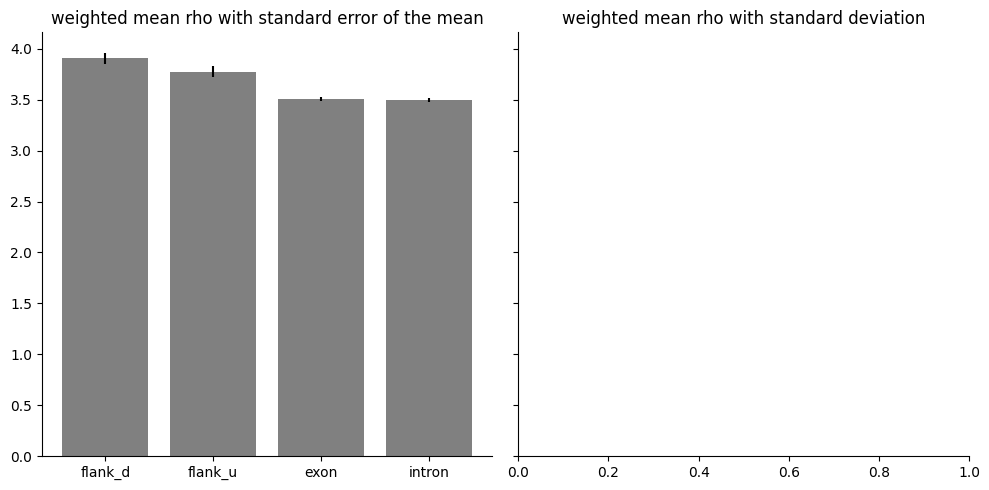

In [32]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,5), sharey=True)
ax.bar(height = [3.909249,3.777496,3.508157,3.498127 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [0.054706,0.053719,0.021512,0.022177], color='grey')
#ax1.bar(height = [3.909249,3.909249,3.508157,3.498127 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [11.521898,11.547933,10.836931,10.512917], color='grey')

ax.set_title("weighted mean rho with standard error of the mean")
ax1.set_title("weighted mean rho with standard deviation")
sns.despine()
plt.tight_layout()
ax.set_ylim(0,)
plt.show()

In [27]:
fd = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_dflank' ]['value'].dropna()
fu = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_uflank' ]['value'].dropna()
ex = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='exon']['RHO'].dropna()
intr = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='intron']['RHO'].dropna()

In [28]:
thsd = scipy.stats.tukey_hsd(fd, fu, ex, intr)

In [29]:
print(thsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.028     0.989    -0.197     0.253
 (0 - 2)      0.401     0.000     0.233     0.569
 (0 - 3)      0.411     0.000     0.242     0.580
 (1 - 0)     -0.028     0.989    -0.253     0.197
 (1 - 2)      0.373     0.000     0.205     0.541
 (1 - 3)      0.383     0.000     0.214     0.552
 (2 - 0)     -0.401     0.000    -0.569    -0.233
 (2 - 1)     -0.373     0.000    -0.541    -0.205
 (2 - 3)      0.010     0.988    -0.068     0.088
 (3 - 0)     -0.411     0.000    -0.580    -0.242
 (3 - 1)     -0.383     0.000    -0.552    -0.214
 (3 - 2)     -0.010     0.988    -0.088     0.068

